In [10]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)  # 生成[0, 1)的 形状是100x1 的随机数

y = 4 + 3 * X + np.random.randn(100, 1) # 生成标准正态分布随机数，常用于噪音

In [11]:
# 直接法求出θ的值
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
# 使用sklearn 求解最小二乘结果，同样是直接法
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_   # 截距和系数

(array([3.82147956]), array([[3.20000601]]))

# 梯度下降

                                批量梯度下降                            

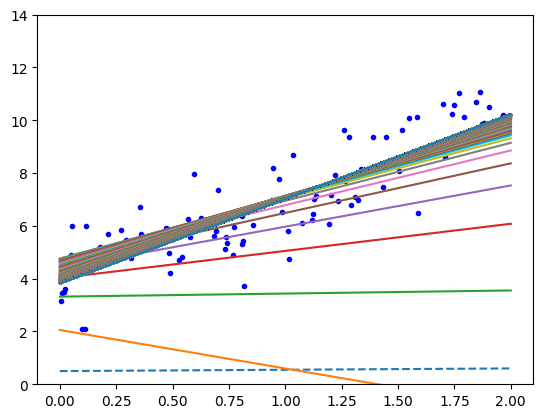

In [29]:
# 在计算梯度下降的每一步时，都是基于完整的训练集X的。
# 这就是为什么该算法会被称为批量梯度下降

plt.ylim(top=14, bottom=0)
plt.plot(X, y, 'b.')

# 批量梯度下降法
eta = 0.1 # 学习率
n_iterations = 1000 # 迭代次数
m = 100
theta = np.random.randn(2,1) # 初始化参数
temp = [0,2]
plt.plot(temp, [0.5,0.6], linestyle='dashed')
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 梯度，该公式详见pdf
    y_predict_line = [theta[0], 2*theta[1]+theta[0]]
    theta = theta - eta * gradients
    plt.plot(temp, y_predict_line)

# 要找到合适的学习率，可以使用网格搜索（见第2章）。
# 但是你可能需要限制迭代次数，这样网格搜索可以淘汰掉那些收敛耗时太长的模型


                        随机梯度下降                        

In [30]:
# 随机梯度下降，每一步在训练集中随机选择一个实例，并且仅基于该单个实例来计算梯度。
# 显然，这让算法变得快多了，因为每次迭代都只需要操作少量的数据

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # 根据范围随机生成一个数字，这里m是上界，0-m
        xi = X_b[random_index:random_index+1]   # 随机取一个样本
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)    # 计算单个样本的梯度
        eta = learning_schedule(epoch * m + i)  # 一个会变化的学习率，逐步降低学习率
        theta = theta - eta * gradients